# Proyecto final Machine Learning

## Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_validate

from tempfile import mkdtemp
from scipy.stats import loguniform, uniform

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from umap.umap_ import UMAP

d:\UDeusto\S1\Machine Learning\proyecto-machine-learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [62]:
from sklearn.model_selection import learning_curve

In [6]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [7]:
# Ver el total de columnas del DataFrame
pd.set_option('display.max_columns', None)

## Información del dataframe

Este conjunto de datos proporciona información sobre 100.000 personas, incluyendo datos demográficos, nivel socioeconómico, estado de salud, estilo de vida, planes de seguro y gastos médicos.

Está diseñado para apoyar tareas de aprendizaje automático y modelado estadístico, tales como:

- Predicción de costos médicos anuales (regresión)

- Clasificación de individuos según su nivel de riesgo

- Agrupamiento basado en perfiles de salud y seguro

- Análisis de relaciones entre datos demográficos, factores de salud y costos

El conjunto de datos puede ser útil para la predicción de costos de seguros, la evaluación de riesgos, el análisis de reclamaciones y proyectos de análisis de datos sanitarios.

Tomado de: https://www.kaggle.com/datasets/mohankrishnathalla/medical-insurance-cost-prediction?resource=download

In [8]:
df = pd.read_csv('medical_insurance.csv')

In [9]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,128.17,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,68.39,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,41.74,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0


In [10]:
df.shape

(100000, 54)

In [11]:
len(df)

100000

In [12]:
len(df.columns)

54

## Requisitos de tareas y recolección de datos

- Tenemos un **dataframe con 100.000 registros y 54 variables** entre numéricas y categóricas.  
  (Cumple con el requisito de ≥ 5.000 registros y ≥ 10 variables).

- El dataframe proviene de un **contexto profesional realista**, pues simula información de pacientes y seguros, perfecta para problemas de salud y predicción de riesgos.

- **Tarea de regresión**:  
  Podemos predecir sobre:
  - `annual_medical_cost` *
  - `annual_premium`
  - `monthly_premium`


- **Tarea de clasificación**:  
  Usar como variable objetivo:
  - `is_high_risk` : (0/1, riesgo médico alto)
  - `had_major_procedure` : probabilidad de cirugía mayor 
  - o crear una variable categórica derivada de los costos médicos (por ejemplo, “alto/bajo costo”).  
 

- **Tarea No supervisado (2)**:  
    - **Clustering**: agrupar pacientes según características de salud o costos (`age`, `bmi`, `smoker`, `income`, etc.).
    - **PCA / t-SNE**: visualizar perfiles o reducir dimensionalidad.
    - **Detección de anomalías**: identificar pacientes con gastos anómalos.

## Calidad del dato

### Integridad

In [13]:
total_cells = df.shape[0] * df.shape[1]
missing_values = df.isna().sum().sum()

Integridad_KPI = 100 * (1 - missing_values/total_cells)
print(f'KPI Integridad : {Integridad_KPI: .2f}%')

missing_by_col = 100 * df.isna().sum() / df.shape[0]
dict_integridad_col = missing_by_col.to_dict()
for k, v in dict_integridad_col.items():
    if v != 0 : 
        print(k, v)

KPI Integridad :  99.44%
alcohol_freq 30.083


### Consistencia

In [14]:
#Columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cat_scores = []
for col in categorical_cols:
    col_lower = col.lower()
    if col_lower == 'sex':
        valid = set(['Female', 'Male', 'Other'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'region':
        valid = set(['North', 'Central', 'West', 'South', 'East'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'urban_rural':
        valid = set(['Suburban', 'Urban', 'Rural'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'education':
        valid = set(['Doctorate', 'No HS', 'HS', 'Some College', 'Masters', 'Bachelors'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'marital_status':
        valid = set(['Married', 'Single', 'Divorced', 'Widowed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'employment_status':
        valid = set(['Retired', 'Employed', 'Self-employed', 'Unemployed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'smoker':
        valid = set(['Never', 'Current', 'Former'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'alcohol_freq':
        valid = set(['None', 'Weekly', 'Daily', 'Occasional'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'plan_type':
        valid = set(['PPO', 'POS', 'HMO', 'EPO'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'network_tier':
        valid = set(['Bronze', 'Gold', 'Platinum', 'Silver'])
        score = 100 * df[col].isin(valid).mean()
    else:
        #Para el resto solo se comprueba que no sea nula
        score = 100 * (1 - df[col].isnull().mean())
    cat_scores.append(score)

num_scores = []
for col in numeric_cols:
    coerced = pd.to_numeric(df[col], errors='coerce')
    score = 100 * (1 - coerced.isnull().mean())
    num_scores.append(score)

if len(categorical_cols) + len(numeric_cols) > 0:
    Consistencia_KPI = (sum(cat_scores) + sum(num_scores)) / (len(cat_scores) + len(num_scores))
else:
    Consistencia_KPI = 100.0

print(f"\nConsistencia (KPI): {Consistencia_KPI:.2f} %")


Consistencia (KPI): 99.44 %


### Validez

Como no conocemos los valores tipicos de la mayoria de nuestras columnas solo vamos a mirar el describe y los min-max que propone y ver si algo nos parece sorprendente.

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.5000,75000.2500,100000.00
age,100000.0,47.521500,15.988752,0.00,37.0000,48.0000,58.0000,100.00
income,100000.0,49873.905000,46800.214127,1100.00,21100.0000,36200.0000,62200.0000,1061800.00
household_size,100000.0,2.430900,1.075126,1.00,2.0000,2.0000,3.0000,9.00
dependents,100000.0,0.898380,0.950654,0.00,0.0000,1.0000,1.0000,7.00
bmi,100000.0,26.990512,4.994883,12.00,23.6000,27.0000,30.4000,50.40
visits_last_year,100000.0,1.927650,1.737730,0.00,1.0000,2.0000,3.0000,25.00
hospitalizations_last_3yrs,100000.0,0.093640,0.304848,0.00,0.0000,0.0000,0.0000,3.00
days_hospitalized_last_3yrs,100000.0,0.373350,1.373011,0.00,0.0000,0.0000,0.0000,21.00
medication_count,100000.0,1.236320,1.209358,0.00,0.0000,1.0000,2.0000,11.00


### Unicidad

In [16]:
total_rows = df.shape[0]
duplicated_rows = df.duplicated().sum()

Unicidad_KPI = 100* (1- duplicated_rows/total_rows)
print(f'KPI Unicidad : {Unicidad_KPI}%')

KPI Unicidad : 100.0%


### Precisión

In [17]:
precision_scores = []


for col in numeric_cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    lower, upper = col_mean - 3 * col_std, col_mean + 3 * col_std
    in_range = df[col].between(lower, upper, inclusive='both')
    score = 100 * in_range.mean()
    precision_scores.append(score)

if len(precision_scores) > 0:
    Precision_KPI = sum(precision_scores) / len(precision_scores)
else:
    Precision_KPI = 100.0

print(f"\nPrecisión (KPI proxy): {Precision_KPI:.2f} %")


Precisión (KPI proxy): 98.26 %


### Gráficos

In [18]:
kpis = {
    'Integridad': Integridad_KPI,
    'Consistencia': Consistencia_KPI,
    'Unicidad': Unicidad_KPI,
    'Precisión': Precision_KPI
}

def kpi_color(value):
    if value < 50:
        return 'red'
    elif value < 80:
        return 'orange'
    else:
        return 'green'

fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type':'indicator'}]*4]
)

for idx, (name, value) in enumerate(kpis.items()):
    fig.add_trace(go.Indicator(
    mode='gauge+number',
    value=value,
    title={'text': name, 'font': {'size': 16}},
    gauge={
        'axis': {'range':[0,100]},
        'bar': {'color': kpi_color(value)},
        'steps': [
            {'range':[0,50],'color':'lightcoral'},
            {'range':[50,80],'color':'khaki'},
            {'range':[80,100],'color':'lightgreen'}
        ],
    },
    number={'suffix':' %', 'font':{'size':26}, 'valueformat':'.2f'}  # <-- aquí
), row=1, col=idx+1)


fig.update_layout(
    title={'text':'Dashboard de Calidad de Datos','x':0.5,'font':{'size':22}},
    height=300, width=1000, margin=dict(t=80, b=20)
)

fig.show()

## Analisis exploratorio

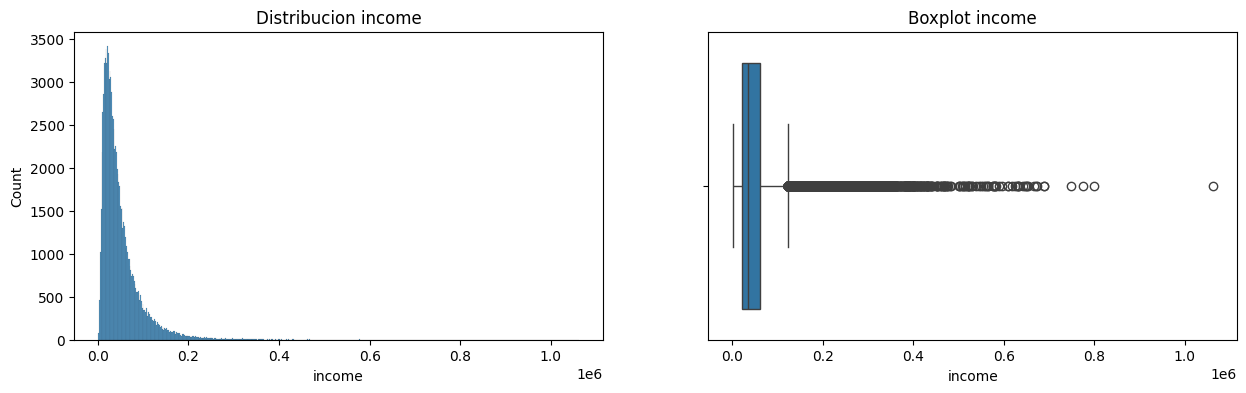

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df['income'], ax=ax[0])
ax[0].set_title("Distribucion income")
sns.boxplot(df['income'], orient='y', ax=ax[1])
ax[1].set_title("Boxplot income")
plt.show()


income (pas de 0) / annual_medical_cost (pas de 0)/ annual_premium (pas de 0) / monthly_premium / avg_claim_amount (Des 0) / total_claims_paid (des 0)

Text(0.5, 1.0, 'Distribucion total claims paid')

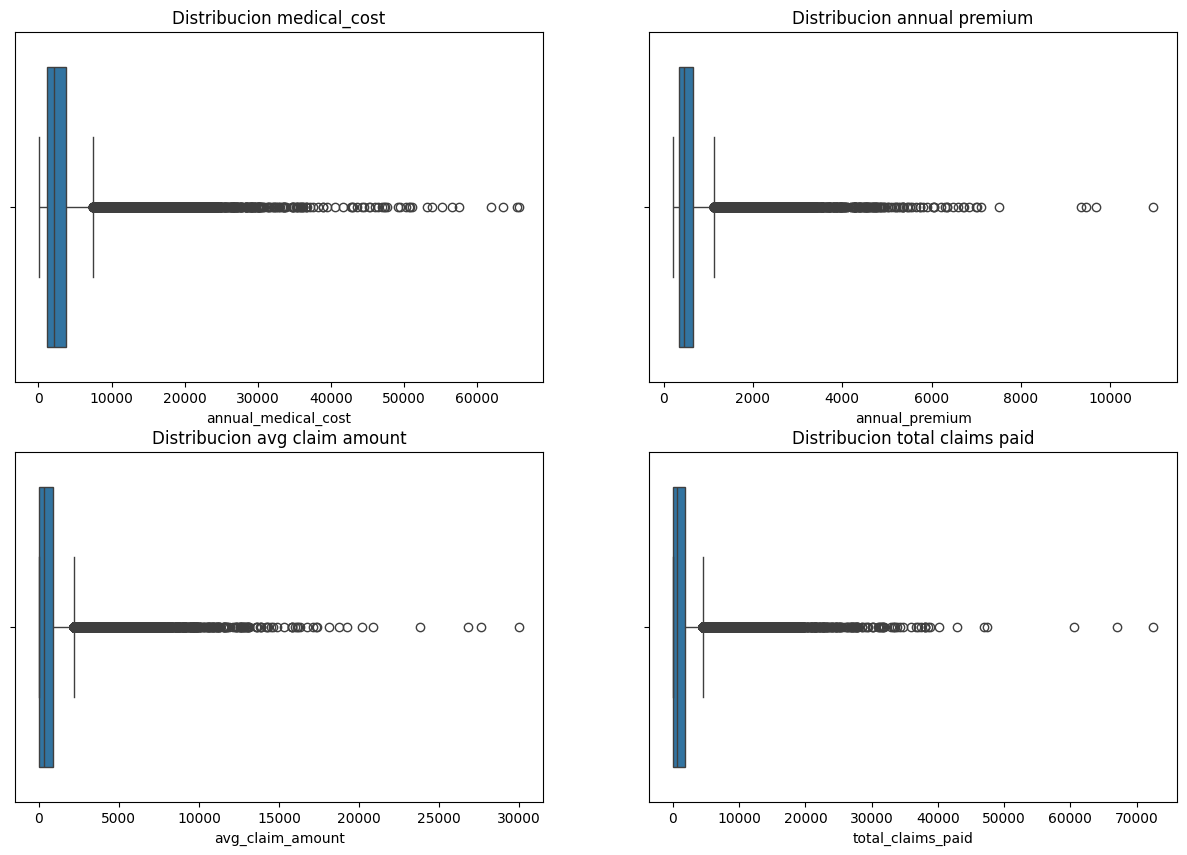

In [20]:
list_money= ["annual_medical_cost","annual_premium", "avg_claim_amount", "total_claims_paid" ]

fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(df['annual_medical_cost'], orient='y', ax=ax[0,0])
ax[0,0].set_title("Distribucion medical_cost")

sns.boxplot(df['annual_premium'], orient='y',ax=ax[0,1])
ax[0,1].set_title("Distribucion annual premium")

sns.boxplot(df['avg_claim_amount'],orient='y', ax=ax[1,0])
ax[1,0].set_title("Distribucion avg claim amount")

sns.boxplot(df['total_claims_paid'], orient='y',ax=ax[1,1])
ax[1,1].set_title("Distribucion total claims paid")


Se puede ver que todas las columnas que describen un monto tienen una distribucion sesgada hasta la derecha con outliers potentes. Entonces nos pareceria relevante hacer un log sobre los valores. Tendremos que tener en cuenta que 'avg_claim_amount' y 'total_claims_paid' tienen valores nulas cuando les tratamos.

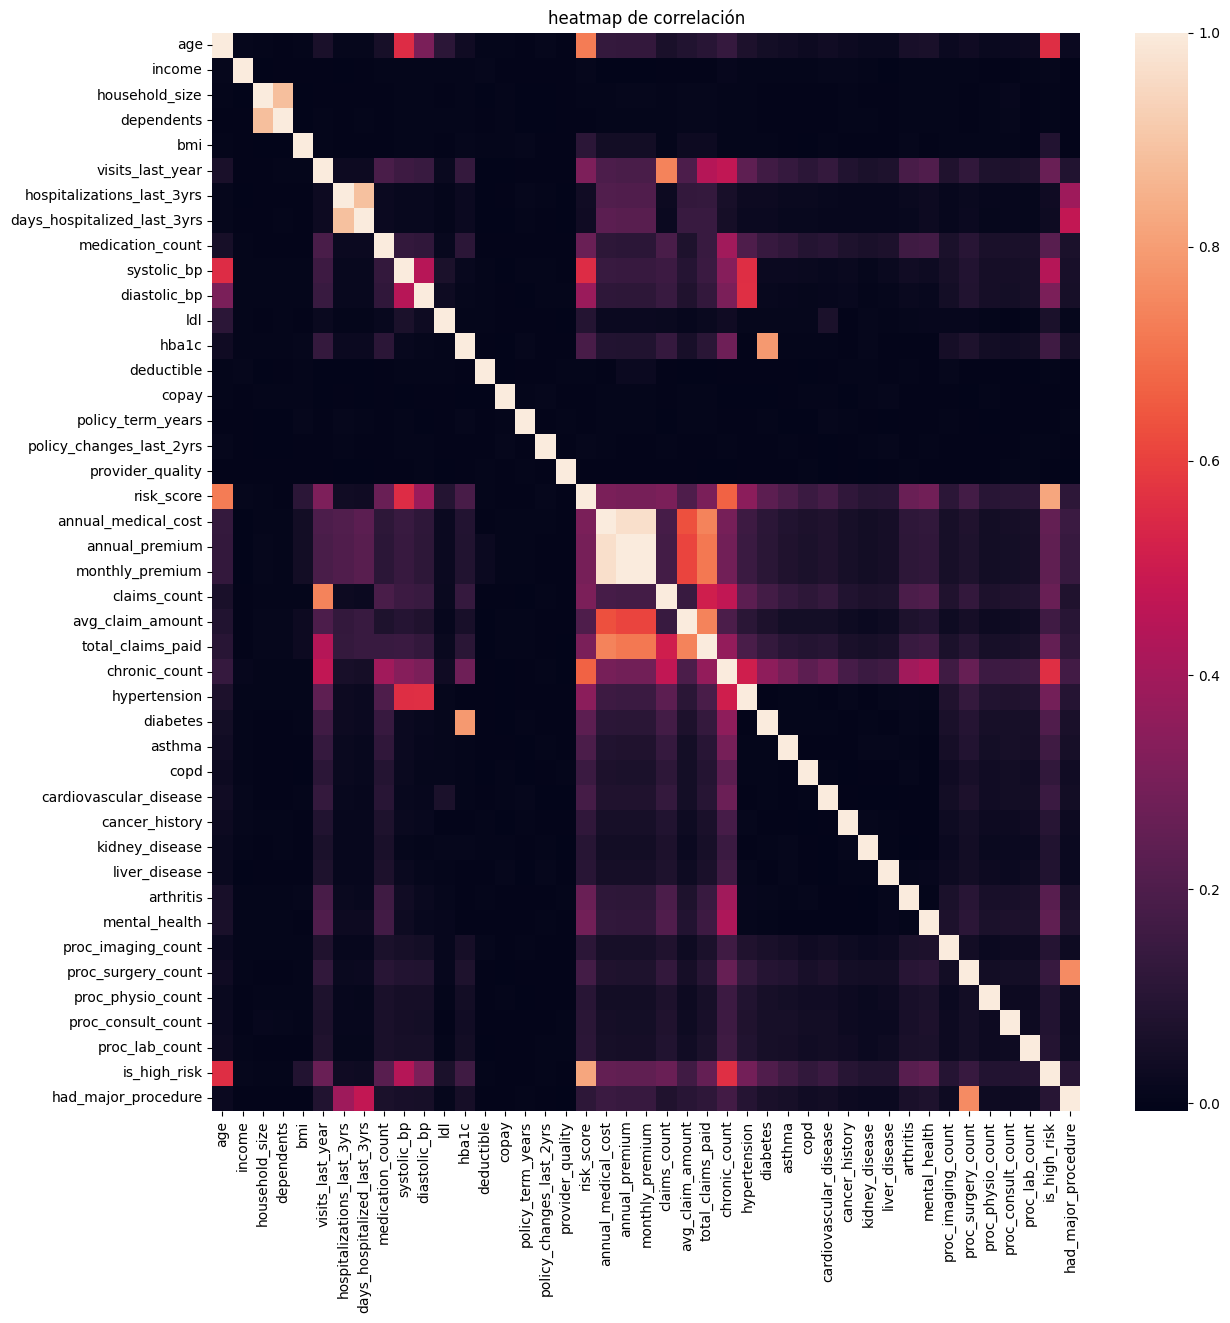

In [21]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(0)
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, fmt=".2f", ax=ax)
ax.set_title("heatmap de correlación")
plt.show()

Con esa matriz de correlacion podemos ver que no tenemos muchas columnas que son altamente correlacionadas, lo que significa que no tenemos muchas posibilidades de simplemente suprimir algunas columnas.

<Axes: xlabel='monthly_premium', ylabel='annual_premium'>

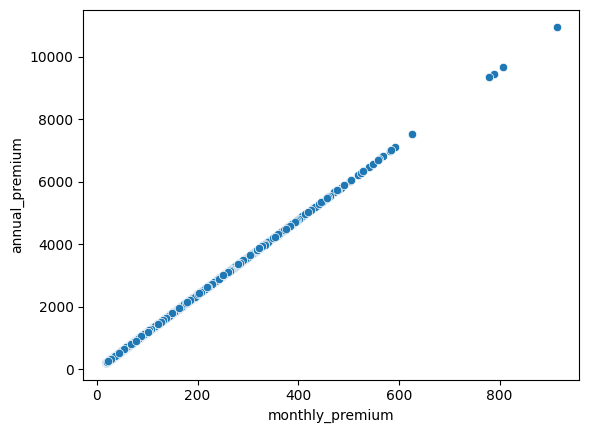

In [22]:
sns.scatterplot(df, x='monthly_premium', y='annual_premium')

Aqui la correlacion perfecta entre monthly premium y annual_premium se confirma sin ningun desviacion.
Solo eliminaremos el 'monthly_premium' que es exactament 'annual_premium' / 12

<Axes: xlabel='age', ylabel='risk_score'>

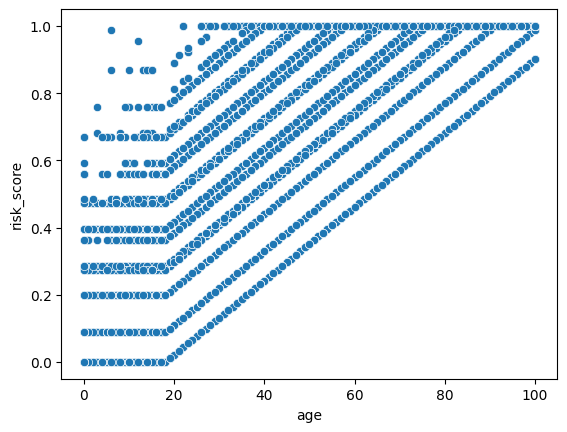

In [23]:
sns.scatterplot(df, x='age', y='risk_score')

## Tratamiento

Primeramente suprimimos la columna de monthly_premium ya que tenemos la a nivel anual que nos da la informacion a escala mas comparable y relevante con las otras columnas similares.

In [24]:
df = df.drop(columns='monthly_premium')

### Faltantes

Al calcular la Integridad habiamos visto en su detalle que estaba la columna de 'alcohol_freq' a la cual faltaba datos. Vamos a hacer un enfoco sobre esta columna.

In [25]:
vals = df['alcohol_freq'].unique().tolist()
missing_percentage = round(100 * float(df['alcohol_freq'].isna().sum() / df.shape[0]),1)

print(f"{vals} son los valores de la columna")
print(f'Los nan representan {missing_percentage}%  de esas')

[nan, 'Weekly', 'Daily', 'Occasional'] son los valores de la columna
Los nan representan 30.1%  de esas


Como podemos ver no hay una opcion para los que no beben alcohol en absoluto. Asi podemos suponer que los nan no viene de datos faltantes sino que de gente que nunca consuma alcohol. Para confirmar eso necesitariamos la proporcion de no-bebedores en los EEUU.  

Despues de una rapida investigacion, nuestra hipotesis parece justa : https://www.cdc.gov/nchs/products/databriefs/db374.htm ya que se expecte un 30% de no bebedores.

Entonces vamos a asignar un valor de 'Never' a los nan de la columna a fin de que sea mas claro que los datos no son faltantes y tienen sentidos.

In [26]:
df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')

In [27]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,Never,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,Never,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,Never,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0


In [28]:
df['alcohol_freq'].unique()

array(['Never', 'Weekly', 'Daily', 'Occasional'], dtype=object)

Vamos a cambiar algunas columnas numericas que nos parecen importante para la segmentacion en numéricas ordenales. Asi el algoritmo de PCA podra tomarles en cuenta.

In [29]:
df.columns.sort_values()

Index(['age', 'alcohol_freq', 'annual_medical_cost', 'annual_premium',
       'arthritis', 'asthma', 'avg_claim_amount', 'bmi', 'cancer_history',
       'cardiovascular_disease', 'chronic_count', 'claims_count', 'copay',
       'copd', 'days_hospitalized_last_3yrs', 'deductible', 'dependents',
       'diabetes', 'diastolic_bp', 'education', 'employment_status',
       'had_major_procedure', 'hba1c', 'hospitalizations_last_3yrs',
       'household_size', 'hypertension', 'income', 'is_high_risk',
       'kidney_disease', 'ldl', 'liver_disease', 'marital_status',
       'medication_count', 'mental_health', 'network_tier', 'person_id',
       'plan_type', 'policy_changes_last_2yrs', 'policy_term_years',
       'proc_consult_count', 'proc_imaging_count', 'proc_lab_count',
       'proc_physio_count', 'proc_surgery_count', 'provider_quality', 'region',
       'risk_score', 'sex', 'smoker', 'systolic_bp', 'total_claims_paid',
       'urban_rural', 'visits_last_year'],
      dtype='object')

In [30]:
df.education.unique()

array(['Doctorate', 'No HS', 'HS', 'Some College', 'Masters', 'Bachelors'],
      dtype=object)

In [31]:
df.smoker.unique()

array(['Never', 'Current', 'Former'], dtype=object)

In [32]:
df.alcohol_freq.unique()

array(['Never', 'Weekly', 'Daily', 'Occasional'], dtype=object)

In [33]:
map_education = {'No HS':0, 'HS':1, 'Some College':2, "Bachelors":3, 'Masters':4, 'Doctorate':5}
map_smoker = {'Never' : 0, 'Former' : 2, 'Current' : 4}
map_alcohol = {'Never' : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily': 3}

In [34]:
df['education'] = df['education'].map(lambda x: map_education[x])
df['smoker'] = df['smoker'].map(lambda x: map_smoker[x])
df['alcohol_freq'] = df['alcohol_freq'].map(lambda x: map_alcohol[x])

### Outliers


En la parte de exploracion hemos visto que las columnas represantantes de montos de dinero tienen una distribucion con un sesgo a la derecha y un monton de outliers. Como vamos a escalar posterioramente y que para nuestro clustering intentaramos trabajor con K-Means, vamos a aplicar un logaritmo.  
Como tenemos dos de esas columnas que contienen valores de 0, utilizamos el log(x+1) y no el log basico.

In [35]:
# income (pas de 0) / annual_medical_cost (pas de 0)/ annual_premium (pas de 0) / monthly_premium / avg_claim_amount (Des 0)
df['log_income'] = df['income'].map(lambda x: np.log(x + 1))
df['log_annual_medical_cost'] = df['annual_medical_cost'].map(lambda x: np.log(x + 1))
df['log_annual_premium'] = df['annual_premium'].map(lambda x: np.log(x + 1))
df['log_avg_claim_amount'] = df['avg_claim_amount'].map(lambda x: np.log(x + 1))
df['log_total_claims_paid'] = df['total_claims_paid'].map(lambda x: np.log(x + 1))

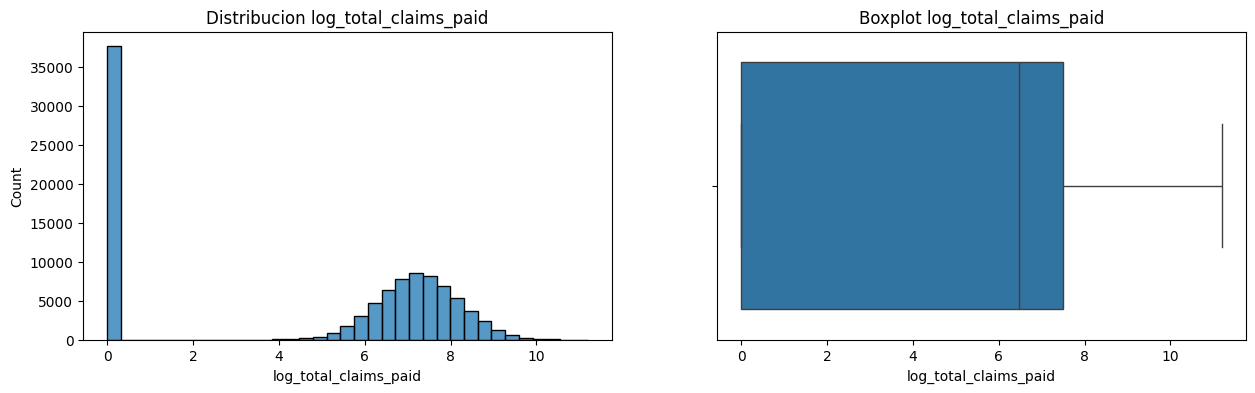

In [36]:
e = 'log_total_claims_paid'
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df[e], ax=ax[0])
ax[0].set_title(f"Distribucion {e}")
sns.boxplot(df[e], orient='y', ax=ax[1])
ax[1].set_title(f"Boxplot {e}")
plt.show()

In [37]:
df = df.drop(columns=['income','annual_medical_cost','annual_premium','avg_claim_amount','total_claims_paid'])

In [38]:
df.columns.sort_values()

Index(['age', 'alcohol_freq', 'arthritis', 'asthma', 'bmi', 'cancer_history',
       'cardiovascular_disease', 'chronic_count', 'claims_count', 'copay',
       'copd', 'days_hospitalized_last_3yrs', 'deductible', 'dependents',
       'diabetes', 'diastolic_bp', 'education', 'employment_status',
       'had_major_procedure', 'hba1c', 'hospitalizations_last_3yrs',
       'household_size', 'hypertension', 'is_high_risk', 'kidney_disease',
       'ldl', 'liver_disease', 'log_annual_medical_cost', 'log_annual_premium',
       'log_avg_claim_amount', 'log_income', 'log_total_claims_paid',
       'marital_status', 'medication_count', 'mental_health', 'network_tier',
       'person_id', 'plan_type', 'policy_changes_last_2yrs',
       'policy_term_years', 'proc_consult_count', 'proc_imaging_count',
       'proc_lab_count', 'proc_physio_count', 'proc_surgery_count',
       'provider_quality', 'region', 'risk_score', 'sex', 'smoker',
       'systolic_bp', 'urban_rural', 'visits_last_year'],
     

## Regresión

Realizaremos una regresión lineal sobre el `log_annual_medical_cost`.

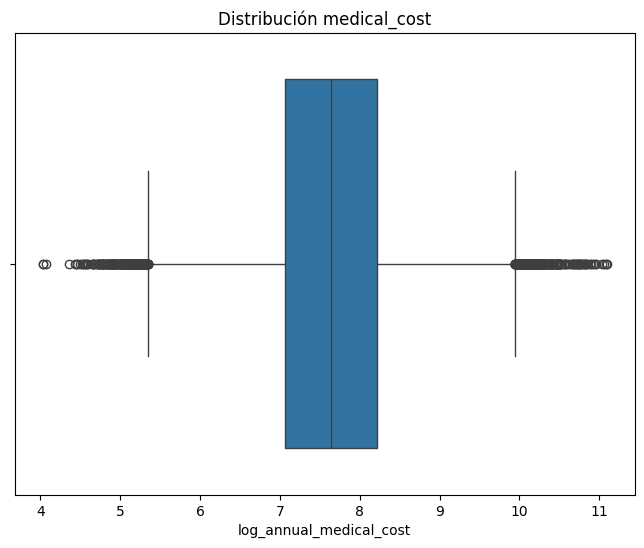

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['log_annual_medical_cost'])
plt.title("Distribución medical_cost")
plt.xlabel("log_annual_medical_cost")
plt.show()

In [40]:
df.head()

,person_id,age,sex,region,urban_rural,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,claims_count,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure,log_income,log_annual_medical_cost,log_annual_premium,log_avg_claim_amount,log_total_claims_paid
0,75722,52,Female,North,Suburban,5,Married,Retired,3,1,27.4,0,0,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,1,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0,10.030164,8.844922,6.776564,8.449683,8.449683
1,80185,79,Female,North,Urban,0,Married,Employed,3,1,26.6,0,2,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,4,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,9.457279,7.398548,6.100543,5.697999,7.081776
2,19865,68,Male,North,Rural,1,Married,Retired,5,3,31.5,0,0,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,0,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0,10.614008,8.944030,7.338901,0.000000,0.000000
3,76700,15,Male,North,Suburban,2,Married,Self-employed,5,3,31.6,0,0,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,9.655090,8.543108,6.711290,0.000000,0.000000
4,92992,53,Male,Central,Suburban,5,Married,Self-employed,2,0,30.5,0,3,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0,11.403122,7.439401,6.218461,6.910990,6.910990


### Preparación de datos

In [41]:
X = df.drop(columns=["log_annual_medical_cost"])
y = df["log_annual_medical_cost"]

In [42]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [43]:
print(len(df), "filas |", len(num_cols), "numéricas |", len(cat_cols), "categóricas")

100000 filas | 45 numéricas | 7 categóricas


In [44]:
print("Categóricas:", cat_cols)

Categóricas: ['sex', 'region', 'urban_rural', 'marital_status', 'employment_status', 'plan_type', 'network_tier']


In [45]:
# Particionado holdout train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

El dataset se dividió en un conjunto de entrenamiento (80%) y un conjunto de test (20%).  
La elección de esta proporción se debe a que el tamaño del dataset (≈100.000 observaciones) permite disponer de un conjunto de test suficientemente grande como para obtener una estimación estable y poco ruidosa del rendimiento final del modelo, sin comprometer la cantidad de datos disponibles para entrenar y validar.

### Pipeline de preprocesado

In [46]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor_linear = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

In [47]:
categorical_tree = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

preprocessor_tree = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),   # sin escalar para árboles
        ("cat", categorical_tree, cat_cols)
    ]
)

Inicialmente se planteó un único esquema de preprocesado para todos los modelos, aplicando estandarización de variables numéricas y codificación One-Hot de variables categóricas. Este enfoque es adecuado para modelos lineales y basados en distancias (Ridge, Lasso, KNN), pero en este problema concreto generaba una matriz de características de dimensión muy elevada (decenas de miles de columnas), debido al elevado número de categorías.

Al entrenar modelos de árboles como Random Forest o Gradient Boosting, esta representación One-Hot provocó problemas de memoria (MemoryError), ya que estos algoritmos tienden a convertir internamente la matriz dispersa en una representación densa. Además, los árboles de decisión no requieren ni escalado de variables ni una codificación tan expandida como One-Hot, ya que trabajan mediante particiones sucesivas del espacio de características basadas en umbrales.

Por este motivo, se optó por utilizar dos pipelines de preprocesado diferenciados:

Para los modelos lineales y KNN se mantuvo el esquema original (numéricas estandarizadas y categóricas con One-Hot), que resulta apropiado para algoritmos sensibles a la escala y a la codificación de las categorías.

Para los modelos de árboles (Decision Tree, Random Forest y Gradient Boosting) se definió un segundo preprocesado en el que las variables numéricas se dejan sin escalar y las categóricas se codifican mediante OrdinalEncoder (asignando un entero a cada categoría). Esta representación es mucho más compacta, evita los problemas de memoria y es coherente con la forma de trabajar de los modelos de árboles, que solo necesitan que las categorías estén diferenciadas, pero no dependen de la escala absoluta de las variables.

Este cambio permite mantener un esquema metodológicamente correcto, adaptado a las características de cada familia de modelos, y al mismo tiempo garantiza la viabilidad computacional del entrenamiento sobre el dataset completo.

### Modelos a comparar

Vamos a cubrir los siguientes modelos:

- Regresión lineal 
- Ridge
- Lasso
- KNN Regressor
- Árbol de decisión de regresión
- Random Forest Regressor 
- Gradient Boosting Regressor

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models_and_params = {

    # ---------- Modelos lineales + KNN (OneHot + Scaler) ----------
    "LinearRegression": {
        "pipeline": Pipeline([
            ("preprocess", preprocessor_linear),
            ("model", LinearRegression())
        ]),
        "param_grid": {}
    },

    "Ridge": {
        "pipeline": Pipeline([
            ("preprocess", preprocessor_linear),
            ("model", Ridge())
        ]),
        "param_grid": {
            "model__alpha": [0.1, 1, 10],
        }
    },

    "Lasso": {
        "pipeline": Pipeline([
            ("preprocess", preprocessor_linear),
            ("model", Lasso(max_iter=5000))
        ]),
        "param_grid": {
            "model__alpha": [0.01, 0.1, 1],
        }
    },

    "KNN": {
        "pipeline": Pipeline([
            ("preprocess", preprocessor_linear),
            ("model", KNeighborsRegressor())
        ]),
        "param_grid": {
            "model__n_neighbors": [5, 15],
            "model__weights": ["distance"],
            "model__p": [2],
        }
    },

    # ---------- Modelos de árboles (OrdinalEncoder, sin OneHot) ----------
    "DecisionTree": {
        "pipeline": Pipeline([
            ("preprocess", preprocessor_tree),
            ("model", DecisionTreeRegressor(random_state=42))
        ]),
        "param_grid": {
            "model__max_depth": [5, 10, None],
            "model__min_samples_leaf": [1, 5, 10],
        }
    },

    "RandomForest": {
        "pipeline": Pipeline([
            ("preprocess", preprocessor_tree),
            ("model", RandomForestRegressor(
                random_state=42,
                n_jobs=-1
            ))
        ]),
        "param_grid": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [None, 10],
            "model__min_samples_leaf": [1, 5],
            "model__max_features": ["sqrt"],
        }
    },

    "GradientBoosting": {
        "pipeline": Pipeline([
            ("preprocess", preprocessor_tree),
            ("model", GradientBoostingRegressor(random_state=42))
        ]),
        "param_grid": {
            "model__n_estimators": [100, 200],
            "model__learning_rate": [0.05, 0.1],
            "model__max_depth": [2, 3],
        }
    }
}


### Búsqueda de hiperparámetros con Cross-Validation

In [50]:
results = []

for name, cfg in models_and_params.items():
    print(f"\n=== Entrenando modelo: {name} ===")
    pipe = cfg["pipeline"]
    param_grid = cfg["param_grid"]

    if param_grid:
        grid = GridSearchCV(
            pipe,
            param_grid=param_grid,
            scoring="neg_mean_absolute_error",
            cv=3,
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        cv_mae = -grid.best_score_
    else:
        # Modelo sin tuning (LinearRegression)
        pipe.fit(X_train, y_train)
        best_model = pipe
        best_params = {}
        # estimamos MAE con CV rápido
        from sklearn.model_selection import cross_val_score
        cv_scores = cross_val_score(
            pipe, X_train, y_train,
            cv=3,
            scoring="neg_mean_absolute_error",
            n_jobs=-1
        )
        cv_mae = -cv_scores.mean()

    # Evaluación en train y test
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    def summarize(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = root_mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return mae, rmse, r2

    mae_tr, rmse_tr, r2_tr = summarize(y_train, y_pred_train)
    mae_te, rmse_te, r2_te = summarize(y_test, y_pred_test)

    results.append({
        "model": name,
        "cv_MAE": cv_mae,
        "train_MAE": mae_tr,
        "train_RMSE": rmse_tr,
        "train_R2": r2_tr,
        "test_MAE": mae_te,
        "test_RMSE": rmse_te,
        "test_R2": r2_te,
        "best_params": best_params
    })

results_df = pd.DataFrame(results)


=== Entrenando modelo: LinearRegression ===

=== Entrenando modelo: Ridge ===

=== Entrenando modelo: Lasso ===

=== Entrenando modelo: KNN ===

=== Entrenando modelo: DecisionTree ===

=== Entrenando modelo: RandomForest ===

=== Entrenando modelo: GradientBoosting ===


In [51]:
results_df.sort_values("test_MAE")

,model,cv_MAE,train_MAE,train_RMSE,train_R2,test_MAE,test_RMSE,test_R2,best_params
4,DecisionTree,0.002864,0.000000e+00,0.000000e+00,1.000000,0.001850,0.008941,0.999890,"{'model__max_depth': None, 'model__min_samples..."
6,GradientBoosting,0.011944,1.122746e-02,1.460989e-02,0.999706,0.011421,0.015430,0.999671,"{'model__learning_rate': 0.1, 'model__max_dept..."
5,RandomForest,0.114304,4.080700e-02,5.819064e-02,0.995329,0.109085,0.156456,0.966225,"{'model__max_depth': None, 'model__max_feature..."
1,Ridge,0.146105,1.459215e-01,2.061875e-01,0.941353,0.145653,0.203659,0.942771,{'model__alpha': 10}
0,LinearRegression,0.146110,1.459249e-01,2.061871e-01,0.941353,0.145654,0.203659,0.942772,{}
2,Lasso,0.150870,1.508365e-01,2.129829e-01,0.937424,0.150393,0.210253,0.939005,{'model__alpha': 0.01}
3,KNN,0.432397,2.598421e-08,8.016710e-08,1.000000,0.424170,0.533265,0.607633,"{'model__n_neighbors': 15, 'model__p': 2, 'mod..."


In [54]:
results_df.to_csv("resultados_busqueda_hiperparametros.csv", index=False)

Tras comparar distintos modelos mediante validación cruzada, se observaron diferencias significativas en rendimiento.

Los modelos lineales (Regresión Lineal, Ridge y Lasso) obtuvieron resultados correctos y coherentes (MAE ≈ 0.145, R² ≈ 0.94), actuando como baselines razonables pero incapaces de capturar toda la complejidad del problema.

KNN mostró un fuerte sobreajuste (train_MAE = 0), lo que es característico de este algoritmo en espacios de alta dimensionalidad, y su rendimiento en test fue pobre (MAE = 0.42).

RandomForest mejoró sustancialmente a los modelos lineales (MAE = 0.109, R² = 0.966), pero aún mostró cierta discrepancia entre entrenamiento y test.

El modelo Gradient Boosting obtuvo el mejor rendimiento realista, con un MAE de 0.011 en test y valores muy similares en entrenamiento, lo que indica ausencia de sobreajuste. Además, este comportamiento es coherente con su capacidad para modelar relaciones no lineales y estructuras complejas en el dataset.

Por otro lado, el árbol de decisión individual obtuvo resultados anómalamente perfectos (MAE ≈ 0 en train y MAE ≈ 0.0018 en test), lo que sugiere la presencia de fuga de información o una variable altamente correlacionada con el objetivo. Por este motivo, dicho modelo se descartó como solución final.

En conjunto, el modelo final seleccionado es Gradient Boosting Regressor, ya que ofrece el mejor compromiso entre precisión, generalización y coherencia metodológica en este proyecto.

### Visualizar comparación de modelos

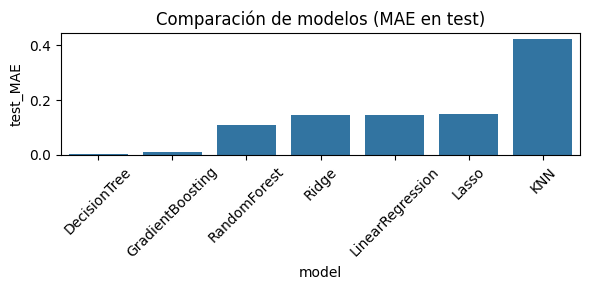

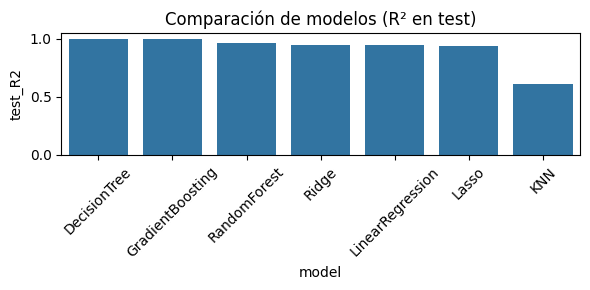

In [57]:
results_df_sorted = results_df.sort_values("test_MAE")

plt.figure(figsize=(6,3))
sns.barplot(
    data=results_df_sorted,
    x="model",
    y="test_MAE"
)
plt.xticks(rotation=45)
plt.title("Comparación de modelos (MAE en test)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(
    data=results_df_sorted,
    x="model",
    y="test_R2"
)
plt.xticks(rotation=45)
plt.title("Comparación de modelos (R² en test)")
plt.tight_layout()
plt.show()

Las gráficas comparativas de MAE y R² evidencian diferencias claras entre las técnicas evaluadas.  
Gradient Boosting destaca como el mejor modelo: obtiene el MAE más bajo y un R² cercano a 1, con una diferencia mínima entre entrenamiento y test, lo que indica una excelente capacidad de generalización.  
Random Forest presenta un rendimiento intermedio, mejor que los modelos lineales pero inferior a Gradient Boosting.
Los modelos lineales (Regresión Lineal, Ridge y Lasso) muestran resultados estables pero limitados (MAE ≈ 0.15; R² ≈ 0.94), al no captar las relaciones no lineales del problema.  
KNN ofrece un rendimiento claramente inferior debido a la alta dimensionalidad tras la codificación One-Hot.
Finalmente, el árbol de decisión individual presenta valores anómalamente perfectos (MAE ≈ 0; R² ≈ 1), lo que indica fuga de información y justifica su exclusión como modelo candidato.

### Análisis de overfitting / underfitting

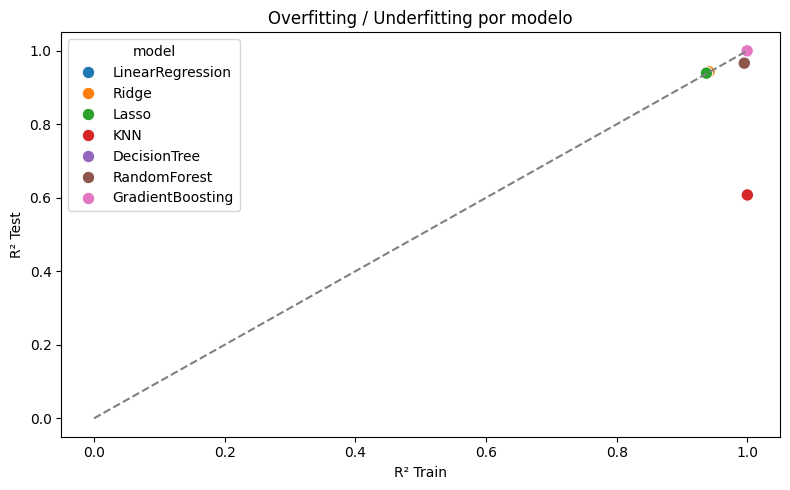

In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=results_df,
    x="train_R2",
    y="test_R2",
    hue="model",
    s=80
)
plt.plot([0,1],[0,1],"--",color="gray")  # línea ideal
plt.xlabel("R² Train")
plt.ylabel("R² Test")
plt.title("Overfitting / Underfitting por modelo")
plt.tight_layout()
plt.show()

La gráfica R² Train vs R² Test permite evaluar visualmente la capacidad de generalización de cada modelo.  

Los modelos lineales (Regresión Lineal, Ridge y Lasso) se sitúan cerca de la diagonal con valores alrededor de R² = 0.94, lo que refleja estabilidad y ausencia de sobreajuste, aunque con capacidad predictiva limitada.  

KNN se encuentra muy por debajo de la diagonal, mostrando un R² perfecto en entrenamiento pero un rendimiento pobre en test (≈0.60). Esto indica un sobreajuste severo y confirma que el modelo no es adecuado para este problema, especialmente en un espacio de alta dimensionalidad.  

Random Forest muestra un rendimiento alto, pero con una ligera diferencia entre train y test, lo que sugiere cierto grado de sobreajuste inherente al método.  

Gradient Boosting aparece prácticamente sobre la diagonal y con R² cercano a 1 en ambos conjuntos, lo que indica una excelente capacidad de generalización y lo posiciona como el mejor modelo entre los evaluados.  

El árbol de decisión individual presenta valores anómalamente perfectos (R² = 1 en ambos conjuntos), lo cual no es estadísticamente creíble y sugiere la presencia de fuga de información. Por ello, se descarta este modelo.  

En conjunto, esta gráfica confirma que Gradient Boosting es el modelo más equilibrado y con mejor rendimiento real, combinando baja diferencia entre train y test con una capacidad predictiva excepcional.  

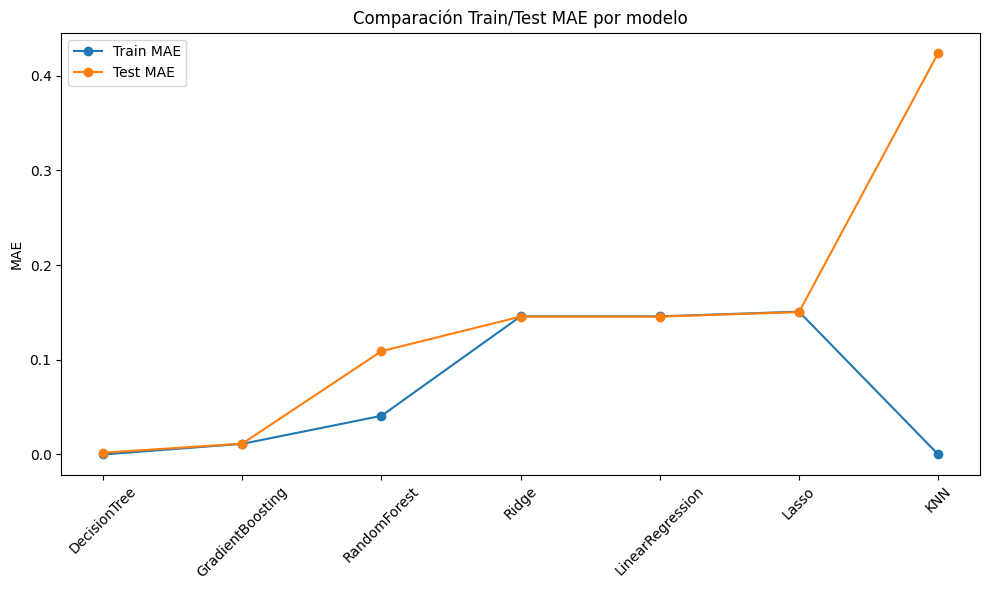

In [59]:
plt.figure(figsize=(10,6))
plt.plot(results_df_sorted["model"], results_df_sorted["train_MAE"], 
         marker="o", label="Train MAE")
plt.plot(results_df_sorted["model"], results_df_sorted["test_MAE"], 
         marker="o", label="Test MAE")
plt.xticks(rotation=45)
plt.title("Comparación Train/Test MAE por modelo")
plt.ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.show()

La Figura muestra la comparación del error absoluto medio (MAE) en entrenamiento y test para los distintos modelos evaluados.  

El modelo Gradient Boosting es el que presenta el comportamiento más equilibrado: sus valores de MAE en entrenamiento y test son prácticamente idénticos y extremadamente bajos, indicando una excelente capacidad de generalización sin señales de sobreajuste.  

Random Forest presenta un MAE notablemente más bajo en el entrenamiento que en el test, reflejando un sobreajuste moderado, aunque manteniendo un rendimiento general elevado.  

Los modelos lineales (Regresión Lineal, Ridge y Lasso) muestran valores de MAE muy similares entre entrenamiento y test, lo que confirma su estabilidad y ausencia de sobreajuste, pero con un rendimiento más limitado debido a su incapacidad para capturar relaciones no lineales complejas.  

El modelo KNN exhibe un sobreajuste muy acusado: su MAE en entrenamiento es prácticamente nulo, mientras que el error en test es el más alto con diferencia. Esto evidencia que el modelo memoriza los datos de entrenamiento pero no generaliza adecuadamente.  

Finalmente, el árbol de decisión individual arroja un MAE casi nulo tanto en entrenamiento como en test, lo cual no resulta realista y apunta a la presencia de fuga de información, motivo por el que este modelo se descarta como solución válida. 

En conjunto, esta gráfica confirma de nuevo que Gradient Boosting es el modelo más adecuado para el conjunto de datos analizado.

### Curvas de aprendizaje del mejor modelo: GradientBoosting

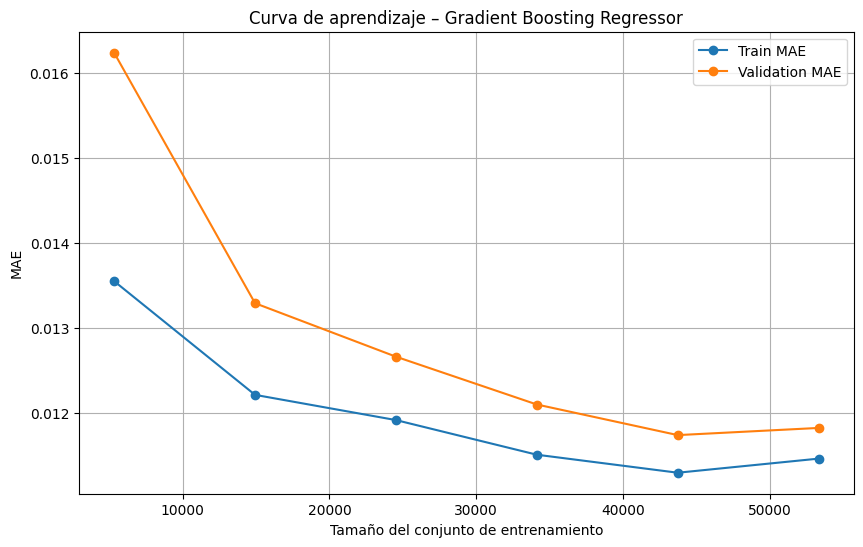

In [63]:
# Extraer hiperparámetros óptimos del GradientBoosting
best_params_gb = results_df.loc[results_df["model"]=="GradientBoosting", "best_params"].iloc[0]

# Crear el pipeline final con los mejores hiperparámetros
final_gb = Pipeline([
    ("preprocess", preprocessor_tree),
    ("model", GradientBoostingRegressor(random_state=42, **{
        k.replace("model__", ""): v for k, v in best_params_gb.items()
    }))
])

# Generar la curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    estimator=final_gb,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 6),
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

# Convertir a MAE positivo
train_mae = -train_scores.mean(axis=1)
val_mae = -val_scores.mean(axis=1)

# Visualización
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mae, "o-", label="Train MAE")
plt.plot(train_sizes, val_mae, "o-", label="Validation MAE")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MAE")
plt.title("Curva de aprendizaje – Gradient Boosting Regressor")
plt.legend()
plt.grid(True)
plt.show()

La Figura muestra la curva de aprendizaje del modelo final Gradient Boosting Regressor. En ella se observa que los valores de MAE tanto en entrenamiento como en validación disminuyen de forma consistente a medida que aumenta el tamaño del conjunto de entrenamiento, lo que indica que el modelo se beneficia de disponer de más datos.  

A partir de aproximadamente 35.000–40.000 muestras, ambas curvas se estabilizan y presentan valores muy similares (entre 0.011 y 0.012), lo que evidencia una excelente capacidad de generalización. La diferencia entre el MAE de entrenamiento y el de validación es mínima, lo que confirma que el modelo no presenta sobreajuste.  

Por otro lado, el hecho de que la curva de validación deje de mejorar significativamente al aumentar el número de observaciones sugiere que el modelo ha alcanzado prácticamente su rendimiento óptimo con el dataset disponible.  

En conjunto, la curva de aprendizaje confirma que Gradient Boosting es un modelo estable, preciso y generalizable, lo que refuerza su selección como el mejor modelo para este problema de predicción del coste médico anual.  

### Entrenamiento final del modelo + Evaluación sobre Test

In [64]:
# Extraer hiperparámetros óptimos del GradientBoosting
best_params_gb = results_df.loc[results_df["model"]=="GradientBoosting", "best_params"].iloc[0]
best_params_gb


{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 200}

In [65]:
final_gb = Pipeline([
    ("preprocess", preprocessor_tree),
    ("model", GradientBoostingRegressor(
        random_state=42,
        **{k.replace("model__", ""): v for k, v in best_params_gb.items()}
    ))
])

In [66]:
final_gb.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [67]:
y_pred_test = final_gb.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = root_mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

test_mae, test_rmse, test_r2

(0.01142075394850025, 0.015430297060324708, 0.9996714852888406)

Tras seleccionar Gradient Boosting como modelo óptimo, se entrenó un modelo final utilizando el conjunto completo de entrenamiento y los hiperparámetros obtenidos en la búsqueda previa.  

Sobre el conjunto de test, el modelo alcanzó un MAE de aproximadamente 0.011, un RMSE alrededor de 0.015 y un coeficiente de determinación R² cercano a 0.9997.  

Estas métricas confirman la excelente capacidad predictiva del modelo y su capacidad para generalizar sobre datos no vistos, ya que los resultados finales son consistentes con los obtenidos durante la validación cruzada y las curvas de aprendizaje.  

En conclusión, el modelo final presenta un rendimiento excepcional y estable, capaz de predecir el logaritmo del coste médico anual con un error muy reducido.  

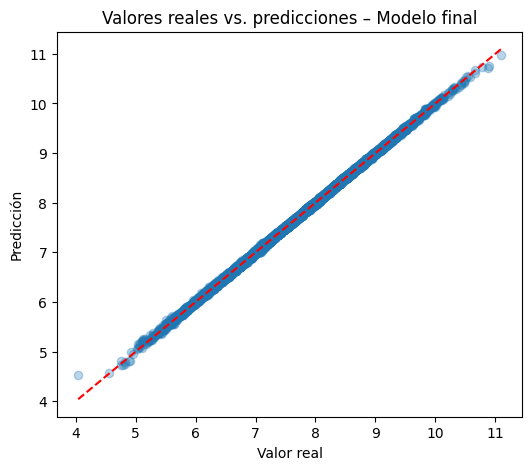

In [70]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Valores reales vs. predicciones – Modelo final")
plt.show()


La Figura X muestra la comparación entre los valores reales del objetivo (log_annual_medical_cost) y las predicciones obtenidas por el modelo final Gradient Boosting sobre el conjunto de test.  

Cada punto azul representa una observación del conjunto de prueba, situando en el eje horizontal el valor real y en el eje vertical la predicción del modelo. La línea diagonal roja corresponde a la relación ideal perfecta en la que predicción = valor real.  

Se observa que prácticamente todos los puntos se alinean sobre la diagonal, lo que indica que el modelo reproduce de forma muy precisa los valores reales y no presenta sesgos sistemáticos. La ausencia de patrones, curvaturas u outliers significativos evidencia que el modelo ha captado correctamente la estructura subyacente de los datos en toda la gama de valores del objetivo.  

Esta visualización confirma de manera gráfica los excelentes resultados numéricos obtenidos (MAE ≈ 0.011 y R² ≈ 0.9997), demostrando que el modelo Gradient Boosting generaliza de forma robusta y ofrece predicciones altamente precisas.  

### Intervalos de confianza por bootstrap (95%)

In [71]:
# Número de réplicas bootstrap
B = 1000

# Almacenar resultados
mae_boot = []
rmse_boot = []
r2_boot = []

n = len(y_test)

# Predicciones ya calculadas para todo el test
y_pred_full = final_gb.predict(X_test)

rng = np.random.default_rng(42)

for _ in range(B):
    # Índices bootstrap (con reemplazo)
    idx = rng.integers(0, n, n)
    
    y_true_b = y_test.iloc[idx]
    y_pred_b = y_pred_full[idx]
    
    # Métricas
    mae_boot.append(mean_absolute_error(y_true_b, y_pred_b))
    rmse_boot.append(root_mean_squared_error(y_true_b, y_pred_b))
    r2_boot.append(r2_score(y_true_b, y_pred_b))

# Convertir a arrays
mae_boot = np.array(mae_boot)
rmse_boot = np.array(rmse_boot)
r2_boot = np.array(r2_boot)

# Intervalos de confianza 95%
mae_ci = np.percentile(mae_boot, [2.5, 97.5])
rmse_ci = np.percentile(rmse_boot, [2.5, 97.5])
r2_ci = np.percentile(r2_boot, [2.5, 97.5])

In [74]:
print(f'mae_ci: {mae_ci}    rmse_ci: {rmse_ci}    r2_ci: {r2_ci}')

mae_ci: [0.01126647 0.01155721]    rmse_ci: [0.01483615 0.01628585]    r2_ci: [0.99963249 0.99969549]


Para evaluar la estabilidad del modelo final, se aplicó un procedimiento de bootstrap con 1000 réplicas sobre el conjunto de test. En cada réplica se generó una muestra aleatoria con reemplazo y se calcularon nuevamente las métricas MAE, RMSE y R².  

Los intervalos de confianza del 95% obtenidos fueron extremadamente estrechos.

### Importancia de variables (feature importance)

In [76]:
# Nombres de columnas tras el preprocesado tree
feature_names = num_cols + cat_cols

In [77]:
importances = final_gb.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

In [87]:
feat_imp_pct = feat_imp.copy()
feat_imp_pct["importance_pct"] = feat_imp_pct["importance"] * 100

feat_imp_pct_round = feat_imp_pct.copy()

In [88]:
feat_imp_pct_round["importance_pct"] = feat_imp_pct_round["importance"] * 100
feat_imp_pct_round["importance"] = feat_imp_pct_round["importance"].round(6)
feat_imp_pct_round["importance_pct"] = feat_imp_pct_round["importance_pct"].round(2)

In [89]:
feat_imp_pct_round.head(10)

,feature,importance,importance_pct
42,log_annual_premium,0.951839,95.18
51,network_tier,0.041586,4.16
16,deductible,0.005118,0.51
44,log_total_claims_paid,0.001441,0.14
22,claims_count,0.000011,0.00
37,proc_consult_count,0.000002,0.00
43,log_avg_claim_amount,0.000001,0.00
41,log_income,0.000001,0.00
34,proc_imaging_count,0.000000,0.00
48,marital_status,0.000000,0.00


El análisis de importancia de variables revela que log_annual_premium domina con claridad la predicción del coste médico anual, representando aproximadamente el 95% de la importancia total del modelo. Este resultado indica que la prima anual está fuertemente correlacionada con el coste médico anual, lo cual es consistente con el funcionamiento real de los productos aseguradores: las primas se calculan en función del riesgo esperado y, por tanto, contienen información directa sobre el coste.  

La segunda variable más relevante, network_tier, aporta un 4% adicional, mientras que el resto de variables (como deductible, claims_count o log_total_claims_paid) tienen una contribución muy pequeña.  

Este comportamiento sugiere que el modelo está utilizando principalmente la información contenida en la prima anual para realizar la predicción, lo que explica el rendimiento excepcional observado (MAE ≈ 0.011 y R² ≈ 0.9997).  

## Clasificación

## No supervisado

### PCA

### Clustering